In [3]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from sklearn.mixture import GMM
from sklearn.decomposition import PCA

In [52]:
N = 10
M = 100
N_ORG = 25
origins = np.random.rand(N_ORG,N)*100
def gen_point(N=10):
    x = np.random.randn(N)
    _lambda = np.sqrt(np.sum(np.square(x)))
    return x/_lambda

def gen_points(origins, N=10, M=100):
    points = []
    for i, org in enumerate(origins):
        for _ in range(M):
            points.append(np.append((gen_point(N)*np.random.randn()*20) + org, np.array([i])))
    return np.array(points)
points = gen_points(origins)
X, Y = points[:, :N], points[:,N]

In [53]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X)

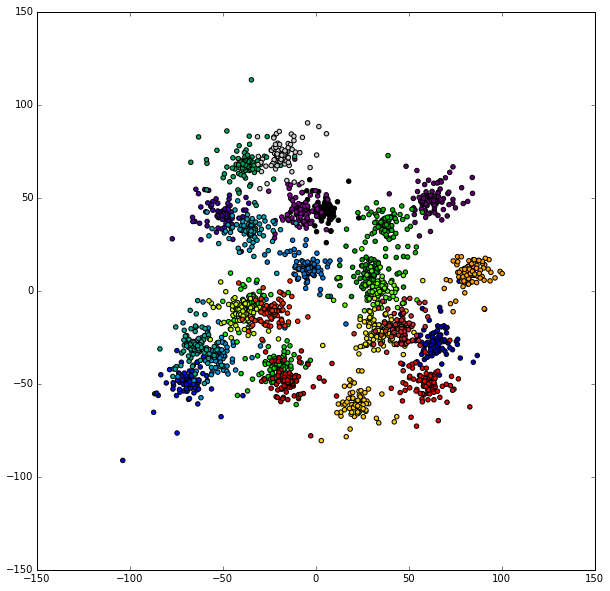

In [54]:
plt.figure(figsize=[10,10])
plt.scatter(X_transform[:, 0], X_transform[:, 1], c=Y, cmap=plt.cm.spectral)

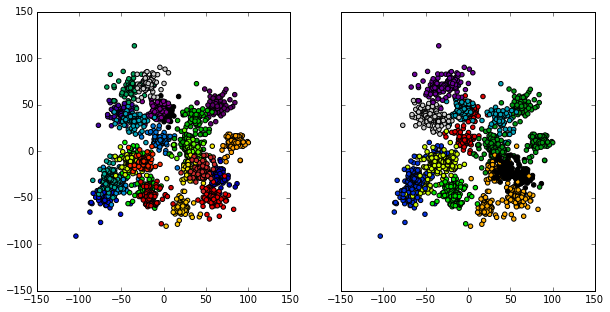

In [55]:
gmm = GMM(n_components=10)
gmm.fit(X)
Y_pred = gmm.predict(X)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[10,5])
ax[0].scatter(X_transform[:, 0], X_transform[:, 1], c=Y, cmap=plt.cm.spectral)
ax[1].scatter(X_transform[:, 0], X_transform[:, 1], c=Y_pred, cmap=plt.cm.spectral)

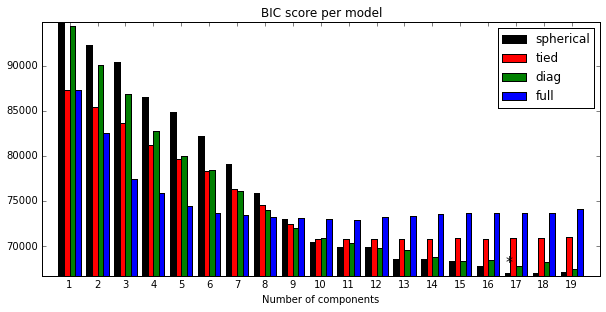

In [42]:
import itertools

lowest_bic = np.infty
bic = []
n_components_range = range(1, 2*N)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=[10,10])
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

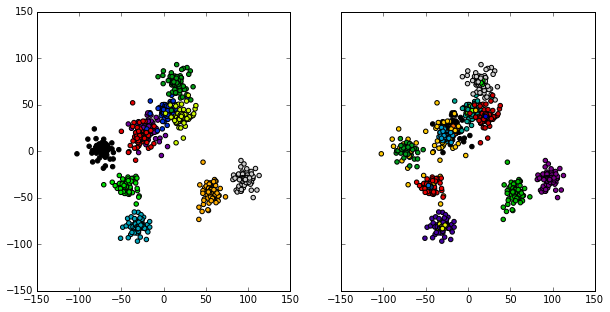

In [48]:
Y_pred = best_gmm.predict(X)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[10,5])
ax[0].scatter(X_transform[:, 0], X_transform[:, 1], c=Y, cmap=plt.cm.spectral)
ax[1].scatter(X_transform[:, 0], X_transform[:, 1], c=Y_pred, cmap=plt.cm.spectral)

In [45]:
from sklearn.manifold import TSNE

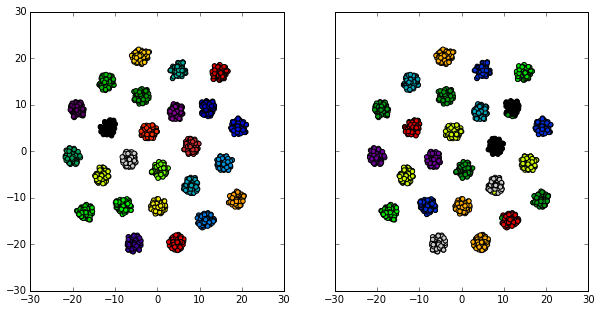

In [56]:
tsne = TSNE(n_components=2, random_state=0)
X_transform_t = tsne.fit_transform(X) 
Y_pred = gmm.predict(X)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[10,5])
ax[0].scatter(X_transform_t[:, 0], X_transform_t[:, 1], c=Y, cmap=plt.cm.spectral)
ax[1].scatter(X_transform_t[:, 0], X_transform_t[:, 1], c=Y_pred, cmap=plt.cm.spectral)